In [1]:
# imports and setup
import numpy as np
from scipy.stats.stats import pearsonr

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

import math

import pandas as pd

%matplotlib inline
pd.set_option('precision', 2) # number precision for pandas
plt.style.use('seaborn') # pretty matplotlib plots

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2.3.1 Basic Commands

In [ ]:
x = np.array([1, 3 , 2, 5])
x

array([1, 3, 2, 5])

In [ ]:
y = np.array([1, 4 , 3, 1])
y

array([1, 4, 3, 1])

In [ ]:
np.size(x)

4

In [ ]:
np.size(y)

4

In [ ]:
x + y

array([2, 7, 5, 6])

In [ ]:
%ls

datasets/  file.pdf  lab2.ipynb


In [ ]:
del x

#### Check workspace variables

In [ ]:
%who
%whos

Axes3D	 math	 matplotlib	 np	 pd	 pearsonr	 plt	 sns	 y	 

Variable     Type        Data/Info
----------------------------------
Axes3D       type        <class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>
math         module      <module 'math' from '/hom<...>37m-x86_64-linux-gnu.so'>
matplotlib   module      <module 'matplotlib' from<...>/matplotlib/__init__.py'>
np           module      <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
pd           module      <module 'pandas' from '/h<...>ages/pandas/__init__.py'>
pearsonr     function    <function pearsonr at 0x7f87672f4ef0>
plt          module      <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
sns          module      <module 'seaborn' from '/<...>ges/seaborn/__init__.py'>
y            ndarray     4: 4 elems, type `int64`, 32 bytes


#### Creating an array

In [ ]:
np.array?

Docstring:
array(object, dtype=None, *, copy=True, order='K', subok=False, ndmin=0)

Create an array.

Parameters
----------
object : array_like
    An array, any object exposing the array interface, an object whose
    __array__ method returns an array, or any (nested) sequence.
dtype : data-type, optional
    The desired data-type for the array.  If not given, then the type will
    be determined as the minimum type required to hold the objects in the
    sequence.
copy : bool, optional
    If true (default), then the object is copied.  Otherwise, a copy will
    only be made if __array__ returns a copy, if obj is a nested sequence,
    or if a copy is needed to satisfy any of the other requirements
    (`dtype`, `order`, etc.).
order : {'K', 'A', 'C', 'F'}, optional
    Specify the memory layout of the array. If object is not an array, the
    newly created array will be in C order (row major) unless 'F' is
    specified, in which case it will be in Fortran order (column major).
   

In [ ]:
x = np.array([[1, 3], [2, 4]])
x

array([[1, 3],
       [2, 4]])

In [ ]:
np.sqrt(x)

array([[1.        , 1.73205081],
       [1.41421356, 2.        ]])

In [ ]:
x**2

array([[ 1,  9],
       [ 4, 16]])

#### Random number generation

In [ ]:
from numpy.random import default_rng
rng = default_rng(1234) # 1234 acts like seed
x = rng.normal(loc=0.0, scale=1.0, size=50)
y = x + rng.normal(loc=50, scale=0.1, size=50)
pearsonr(x, y)[0]

0.9962618320211745

In [ ]:
np.mean(y)

49.91063810578677

In [ ]:
np.var(y)

1.3735796778657061

In [ ]:
np.std(y)

1.1719981560846016


## 2.3.2 Graphpics


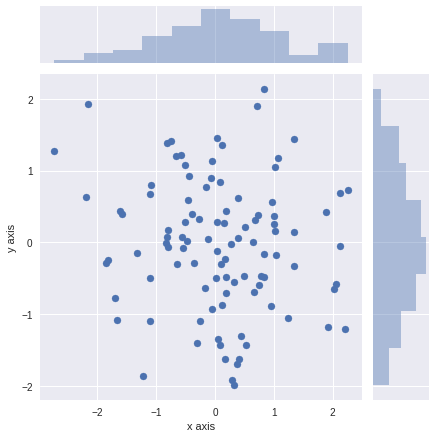

In [ ]:
x = rng.normal(size=100)
y = rng.normal(size=100)

# seaborn joinplot combining scatterplot and hist
p = sns.jointplot(x, y, kind='scatter')
p.set_axis_labels(xlabel='x axis', ylabel='y axis')
p.savefig('file.pdf')

Create a sequence

In [ ]:
x = np.arange(1,10)
x

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

<a list of 60 text.Text objects>

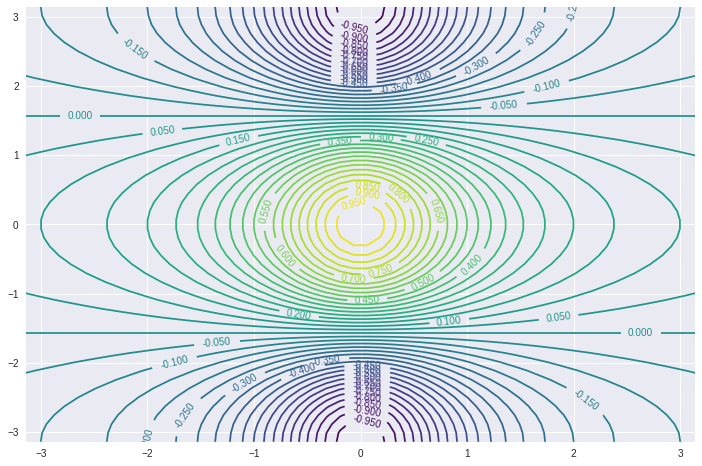

In [ ]:
x = np.linspace(-np.pi, np.pi, 50)
y = x

xv, yv = np.meshgrid(x, y)
f = np.cos(yv) / (1 + xv**2)

fig, ax = plt.subplots(figsize=(12,8))
cp = ax.contour(x, y, f, 45,  cmap='viridis')
plt.clabel(cp, inline=1, fontsize=10)

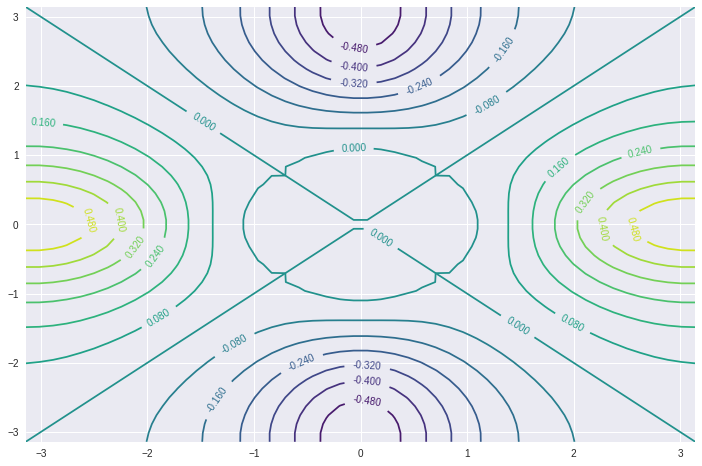

In [ ]:
fa = (f - f.transpose())/2
fig, ax = plt.subplots(figsize=(12,8))
cp = ax.contour(x, y, fa, 15, cmap='viridis')
plt.clabel(cp, inline=1, fontsize=10);

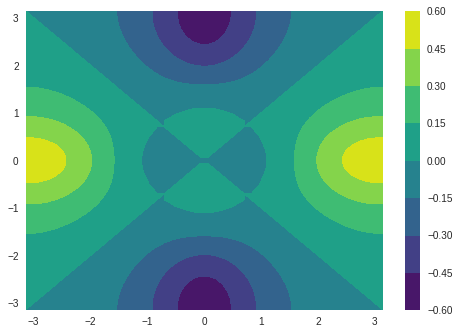

In [ ]:
# heatmap
plt.contourf(x, y, fa, cmap='viridis')
plt.colorbar();

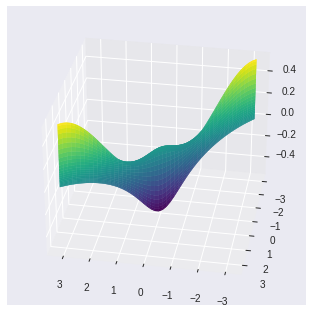

In [ ]:
# 3d perspective
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, fa, cmap='viridis')
ax.view_init(30, 100);

## 2.3.3 Indexing Data

In [ ]:
A = np.arange(1, 17).reshape((4, 4), order="F")
A

array([[ 1,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15],
       [ 4,  8, 12, 16]])

In [ ]:
A[0:2, 1:2]

array([[5],
       [6]])

## 2.3.4 Loading Data

In [ ]:
import pandas as pd

In [10]:
path_on_github = "https://raw.githubusercontent.com/mjalalimanesh/Statistical-Learning-ISLR-python/master/datasets/Auto.csv"
Auto = pd.read_csv(path_on_github, na_values=['?'])

In [11]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [13]:
print(Auto.shape)
Auto.dropna(inplace=True)
print(Auto.shape)
print(Auto.columns)

(392, 9)
(392, 9)
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')


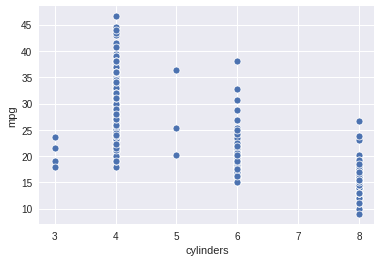

In [25]:
import seaborn as sns

fig, ax = plt.subplots(1, 1)
sns.scatterplot(data=Auto, x="cylinders", y="mpg", ax=ax)

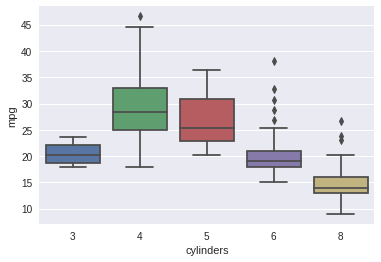

In [24]:
fig, ax = plt.subplots(1, 1)
sns.boxplot(data=Auto, x="cylinders", y="mpg", ax=ax)